<a href="https://colab.research.google.com/github/Radhika02-rjn/Radhika02-rjn/blob/main/bitcoin_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.ticker as mtick
import yfinance as yf

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout


In [ ]:
# Download BTC-USD data from Yahoo Finance
df = yf.download('BTC-USD', start='2015-01-01', end='2025-03-31')
df = df[['Open', 'High', 'Low', 'Close', 'Volume']]
df.dropna(inplace=True)
df.head()


[*********************100%***********************]  1 of 1 completed


Price,Open,High,Low,Close,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2015-01-01,320.434998,320.434998,314.002991,314.248993,8036550
2015-01-02,314.079010,315.838989,313.565002,315.032013,7860650
2015-01-03,314.846008,315.149994,281.082001,281.082001,33054400
2015-01-04,281.145996,287.230011,257.612000,264.195007,55629100
2015-01-05,265.084015,278.341003,265.084015,274.473999,43962800


In [ ]:
df.tail()

Price,Open,High,Low,Close,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2025-03-26,87460.234375,88292.156250,85861.453125,86900.882812,26704046038
2025-03-27,86896.257812,87786.726562,85837.937500,87177.101562,24413471941
2025-03-28,87185.234375,87489.859375,83557.640625,84353.148438,34198619509
2025-03-29,84352.070312,84567.335938,81634.140625,82597.585938,16969396135
2025-03-30,82596.984375,83505.000000,81573.250000,82334.523438,14763760943


In [ ]:
# Use 'Close' price for prediction
close_data = df['Close'].values.reshape(-1, 1)

# Normalize
scaler = MinMaxScaler()
scaled_close = scaler.fit_transform(close_data)


In [ ]:
# Create sequences for LSTM (e.g., 60 timesteps)
X = []
y = []
timesteps = 60

for i in range(timesteps, len(scaled_close)):
    X.append(scaled_close[i-timesteps:i])
    y.append(scaled_close[i])

X, y = np.array(X), np.array(y)


In [ ]:
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [ ]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(64))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 64)              │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 60, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 49,985 (195.25 KB)

 Trainable params: 49,985 (195.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 11s 75ms/step - loss: 0.0054 - val_loss: 8.4065e-04
Epoch 2/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 10s 69ms/step - loss: 7.4694e-04 - val_loss: 9.2058e-04
Epoch 3/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - loss: 5.5468e-04 - val_loss: 0.0012
Epoch 4/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 10s 59ms/step - loss: 6.9461e-04 - val_loss: 8.1716e-04
Epoch 5/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 11s 72ms/step - loss: 5.3231e-04 - val_loss: 0.0011
Epoch 6/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 10s 73ms/step - loss: 4.0419e-04 - val_loss: 5.8832e-04
Epoch 7/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 9s 56ms/step - loss: 4.0327e-04 - val_loss: 0.0014
Epoch 8/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 7s 74ms/step - loss: 4.0742e-04 - val_loss: 5.0516e-04
Epoch 9/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - loss: 3.5202e-04 - val_loss: 0.0016
Epoch 10/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 10s 60ms/step - loss: 3.9622e-04 - val_loss: 4.3748e-04
Epoch 11/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 10s 56ms/step - loss: 3.7447e-04 - val_loss:

In [ ]:
predicted_scaled = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_scaled)
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Flatten the arrays (if they're not already)
y_true = actual_prices.flatten()
y_pred = predicted_prices.flatten()

# ✅ Mean Squared Error
mse = mean_squared_error(y_true, y_pred)

# ✅ Root Mean Squared Error
rmse = np.sqrt(mse)

# ✅ R² Score
r2 = r2_score(y_true, y_pred)

# 🔍 Display the results
print("📉 LSTM Model Evaluation Metrics:")
print(f"🔹 Mean Squared Error (MSE): {mse:.2f}")
print(f"🔹 Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"🔹 R² Score: {r2:.4f}")


📉 LSTM Model Evaluation Metrics:
🔹 Mean Squared Error (MSE): 5487831.00
🔹 Root Mean Squared Error (RMSE): 2342.61
🔹 R² Score: 0.9881


<ipython-input-11-f54d5b5f4356>:19: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


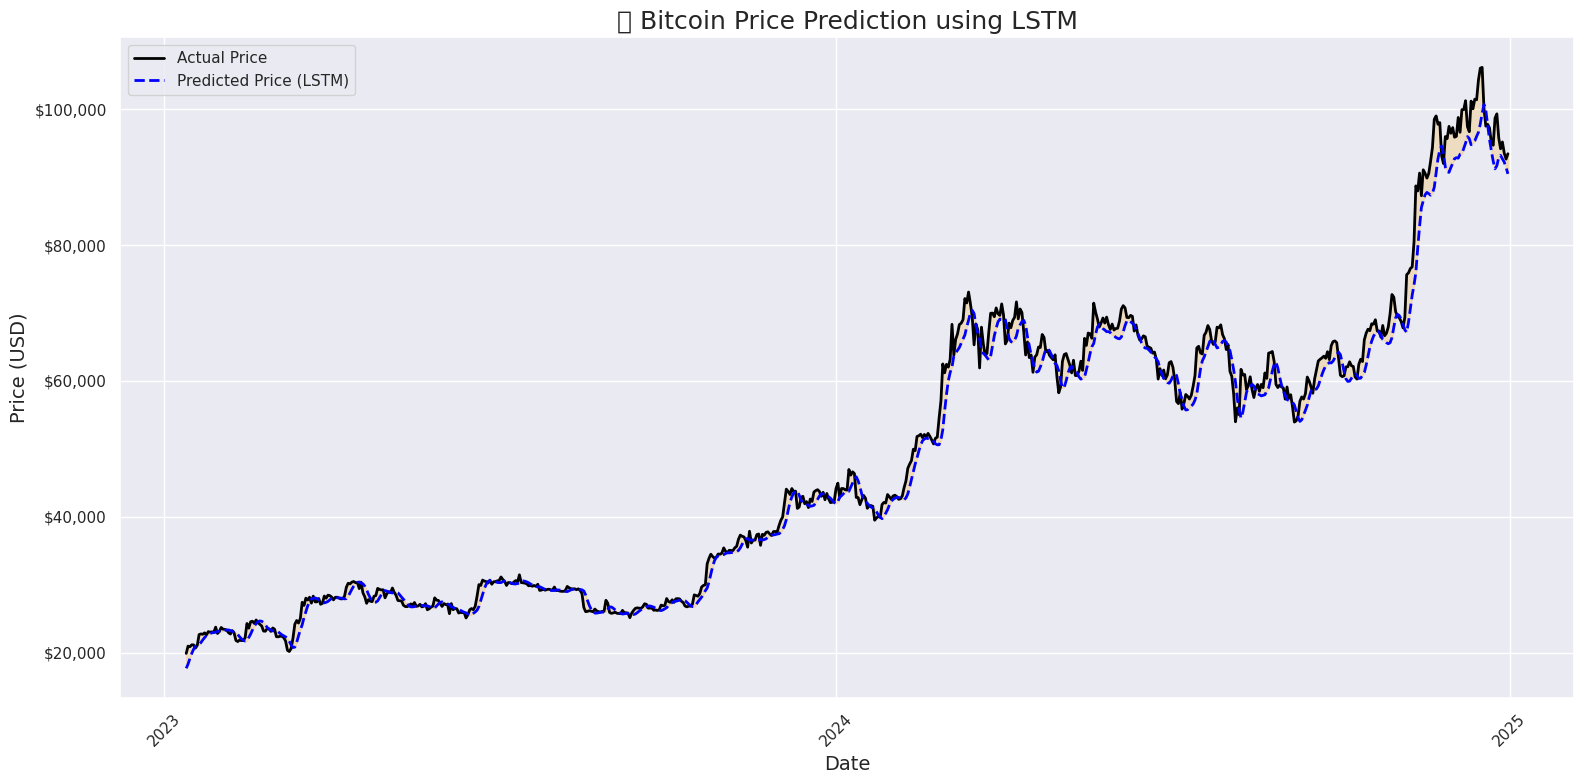

In [ ]:
dates = df.index[-len(actual_prices):]  # match test set

plt.figure(figsize=(16, 8))
sns.set_theme(style='darkgrid')

plt.plot(dates, actual_prices, label='Actual Price', color='black', linewidth=2)
plt.plot(dates, predicted_prices, label='Predicted Price (LSTM)', color='blue', linestyle='--', linewidth=2)
# Convert dates to a NumPy array before flattening
plt.fill_between(dates.to_numpy(), actual_prices.flatten(), predicted_prices.flatten(), color='orange', alpha=0.2)

plt.title('📊 Bitcoin Price Prediction using LSTM', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price (USD)', fontsize=14)
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Generate Buy/Sell/Hold signals
suggestions = []

for actual, predicted in zip(actual_prices, predicted_prices):
    if predicted > actual * 1.01:
        suggestions.append("BUY")
    elif predicted < actual * 0.99:
        suggestions.append("SELL")
    else:
        suggestions.append("HOLD")


In [ ]:
# Create a DataFrame with signals
suggestion_df = pd.DataFrame({
    'Date': dates,
    'Actual Price': actual_prices.flatten(),
    'Predicted Price': predicted_prices.flatten(),
    'Signal': suggestions
})

suggestion_df.set_index('Date', inplace=True)
suggestion_df.tail(15)  # View last few rows


,Actual Price,Predicted Price,Signal
Date,,,
2024-12-17,106140.601562,99385.578125,SELL
2024-12-18,100041.539062,100680.945312,HOLD
2024-12-19,97490.953125,99803.859375,BUY
2024-12-20,97755.929688,97617.539062,HOLD
2024-12-21,97224.726562,95528.382812,SELL
2024-12-22,95104.937500,93879.257812,SELL
2024-12-23,94686.242188,92334.023438,SELL
2024-12-24,98676.093750,91210.859375,SELL
2024-12-25,99299.195312,91676.414062,SELL
